In [3]:
import numpy as np
from matplotlib import pyplot as plt
from data import data_utils 
import math

In [4]:
def kCrossFold(xtrain,j,k=5):
    
    length = np.shape(xtrain)[0]
    foldSize = int(length/k)
    folds = []
    for i in range (0,k):
        if i != j:
            folds.extend(xtrain[i*foldSize: foldSize*(i+1)])
        else:
            val = xtrain[i*foldSize: foldSize*(i+1)]

    return np.array(folds), np.array(val)


In [5]:
def L2knnclassifier(xtrain, ytrain, xtest, k):
    
#     print(np.shape(xtrain))
    dist = np.sqrt(np.sum(np.square(xtrain-xtest),axis = 1))
#     print(np.shape(dist))
#     print('distance',dist)
#     print(dist[k])
    
#     print('l2')
#     print(dist)
#     print(dist.shape)
    inn = np.argpartition(dist,kth = k)[:k]
#     print(inn)
    vote, count = np.unique(ytrain[inn], return_counts=True)
    ytest = np.mean(vote)
    return np.array([ytest])

In [6]:
def L1knnclassifier(xtrain, ytrain, xtest, k):

#     print(xtrain.shape)
    dist = np.sum(abs(xtrain-xtest),axis = 1)
#     print(dist.shape)
    inn = np.argpartition(dist.T, kth=k)[:k]
#     print('l1')
#     print(dist)
#     print(dist.shape)
#     print(inn)


    vote, count = np.unique(ytrain[inn], return_counts=True)
    ytest = np.mean(vote)
    return np.array([ytest])

In [7]:
def RMSE(trueVal, predictedVal): 
#     print(np.shape(trueVal))
#     print(np.shape(predictedVal))
    error = np.sqrt(((trueVal - predictedVal).T @ (trueVal- predictedVal)))/trueVal.shape[0]
#     print(np.shape(error))

#     print(error)
    return error

In [8]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('pumadyn32nm')



x_train = np.vstack([x_train,x_valid])
y_train = np.vstack([y_train,y_valid])


np.random.seed(2)
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]


#error variables

l2error = []
l1error = []

kvalues = list(range(1, 40))
l1error = np.zeros(len(kvalues))
l2error = np.zeros(len(kvalues))




#Do Cross validation on Dataset

foldLength = int(x_train.shape[0]/5)

for split in range(5):
    
    xtrain, xval = kCrossFold(x_train,split)
    ytrain, yval = kCrossFold(y_train,split)
    
    
    
#     print('xtrain',np.shape(xtrain))
#     print('xval',np.shape(xval))
#     print('ytrain',np.shape(ytrain))
#     print('yval',np.shape(yval))

    for k in range(len(kvalues)):
        
        y_predictedL1 = []
        y_predictedL2 = []
        
#         print(xval.shape[0])

        for i in range(0,xval.shape[0]):
                    
            y_predictedL2.append(L2knnclassifier(xtrain, ytrain, xval[i], kvalues[k]))
            y_predictedL1.append(L1knnclassifier(xtrain, ytrain, xval[i], kvalues[k]))
#             break
#             print(yval.shape[0])
#             print(y_predictedL2)
#         break
        l2error[k] += RMSE(yval, y_predictedL2)
        l1error[k] += RMSE(yval, y_predictedL1)
        
l2error = l2error/5
l1error = l1error/5





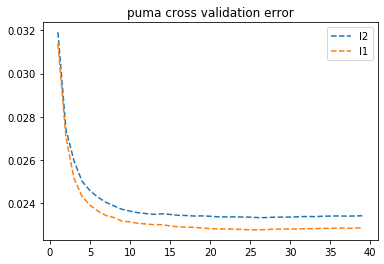

0.02275278655976338

In [9]:
plt.plot(kvalues,l2error, '--', kvalues, l1error,'--')
plt.legend(['l2', 'l1'])
plt.title('puma cross validation error')
plt.show()

l1error[1]
np.argmin(l1error)
l1error[25]


In [12]:
k = 1
    
testPredicted = []
        
for i in range(0,x_train.shape[0]):
                    
    testPredicted.append(L1knnclassifier(x_train, y_train, x_train[i], k))                

l2error = RMSE(y_test, testPredicted)

print(l2error)

1.393241852994977


Text(0.5, 1.0, 'mauna_loa Data Set with training prediction')

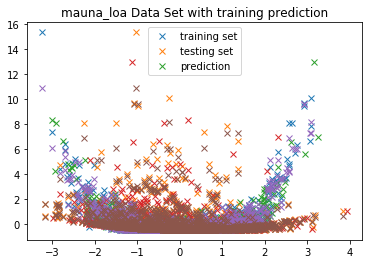

In [13]:
plt.plot(x_train,y_train,'x',x_test,y_test,'x',x_train,testPredicted,'x')
plt.legend(['training set', 'testing set', 'prediction'])
plt.title('mauna_loa Data Set with training prediction')


In [13]:
k = 25
    
testPredicted = []
        
for i in range(0,x_test.shape[0]):
                    
    testPredicted.append(L1knnclassifier(x_train, y_train, x_test[i], k))                

l2error = RMSE(y_test, testPredicted)

print(l2error)

[[0.02907147]]


Text(0.5, 1.0, 'mauna_loa Data Set with test prediction')

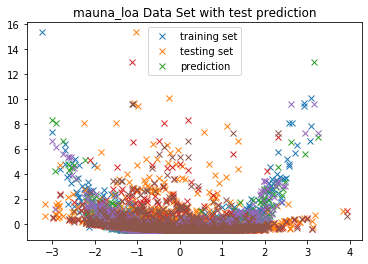

In [15]:
plt.plot(x_train,y_train,'x',x_test,y_test,'x',x_test,testPredicted,'x')
plt.legend(['training set', 'testing set', 'prediction'])
plt.title('mauna_loa Data Set with test prediction')

